In [1]:
import sqlite3
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.metrics import mutual_info_score

In [2]:
conn =  sqlite3.connect("C://Users//Victor Manuel//Documents//Machine Learning//soccer-analysis//database//database.sqlite")

table_name = "Match"
query = f"SELECT * FROM {table_name};"

match_df = pd.read_sql_query(query, conn)

In [3]:
table_name = "Player"
query = f"SELECT * FROM {table_name};"
player_df = pd.read_sql_query(query,conn)

In [4]:
table_name = 'Team'
query = f"SELECT * FROM {table_name};"
teams_df = pd.read_sql_query(query, conn)

The file "database.sqlite" contains:

Tables	
- Country	
- League	
- Match	
- Player	
- Player_Attributes	
- Team	
- Team_Attributes


In [5]:
teams_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [6]:
match_df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [7]:
def compare_columns(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1
    else:
        return 0

In [8]:
h_players = 'home_player_'
a_players = 'away_player_'
home_players = []
away_players = []

for i in range(11):
    home_players.append(h_players+str(i+1))
    away_players.append(a_players+str(i+1))

features = ['home_team_api_id','away_team_api_id','home_team_goal','away_team_goal'] + home_players + away_players
print(features)

['home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11']


-> Filtering for Premier League id (1729).

-> Merging the match_df dataframe with player_df resulting in a dataframe with players name by match.

In [9]:
match_df = match_df[match_df['league_id'] == 1729]
df = match_df[features]
df = df.dropna()

for i in range(len(home_players)):
    
    #merging match_df with player_df
    df = df.merge(player_df, left_on = home_players[i], right_on='player_api_id', how= 'left')
    df.drop(columns = [home_players[i],'id','player_api_id','player_fifa_api_id','birthday','height','weight'],inplace = True)
    df.rename(columns={'player_name': 'name_home_player_'+str(i+1)}, inplace = True)

    df = df.merge(player_df, left_on = away_players[i], right_on='player_api_id', how = 'left')
    df.drop(columns = [away_players[i],'id','player_api_id','player_fifa_api_id','birthday','height','weight'],inplace = True)
    df.rename(columns={'player_name': 'name_away_player_'+str(i+1)}, inplace = True)

#mergin match_df with teams_df
df = df.merge(teams_df, left_on = 'home_team_api_id', right_on = 'team_api_id' ,how = 'left')
df.rename(columns = {'team_short_name':'home_team'}, inplace = True)
df.drop(columns = ['home_team_api_id','id','team_api_id','team_fifa_api_id','team_long_name'],inplace = True)

df = df.merge(teams_df, left_on = 'away_team_api_id', right_on = 'team_api_id' ,how = 'left')
df.rename(columns = {'team_short_name':'away_team'},inplace = True)
df.drop(columns = ['away_team_api_id','id','team_api_id','team_fifa_api_id','team_long_name'],inplace = True)

Lowering str columns and inserting "_"

In [10]:
str_col = list(df.dtypes[df.dtypes == 'object'].index)
for col in str_col:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [11]:
df['home_team_win'] = df.apply(compare_columns,axis=1)
df.drop(columns = ['home_team_goal','away_team_goal'],inplace = True)
df.head()

,name_home_player_1,name_away_player_1,name_home_player_2,name_away_player_2,name_home_player_3,name_away_player_3,name_home_player_4,name_away_player_4,name_home_player_5,name_away_player_5,...,name_away_player_8,name_home_player_9,name_away_player_9,name_home_player_10,name_away_player_10,name_home_player_11,name_away_player_11,home_team,away_team,home_team_win
0,edwin_van_der_sar,shay_given,wes_brown,habib_beye,rio_ferdinand,steven_taylor,nemanja_vidic,fabricio_coloccini,patrice_evra,charles_n'zogbia,...,nicky_butt,ryan_giggs,jonas_gutierrez,fraizer_campbell,damien_duff,wayne_rooney,obafemi_martins,mun,new,0
1,manuel_almunia,scott_carson,bacary_sagna,carl_hoefkens,william_gallas,leon_barnett,johan_djourou,abdoulaye_meite,gael_clichy,paul_robinson,...,chris_brunt,samir_nasri,james_morrison,emmanuel_adebayor,marek_cech,nicklas_bendtner,ishmael_miller,ars,wba,1
2,craig_gordon,pepe_reina,pascal_chimbonda,alvaro_arbeloa,nyron_nosworthy,jamie_carragher,danny_collins,sami_hyypiae,phil_bardsley,andrea_dossena,...,damien_plessis,kieran_richardson,yossi_benayoun,el_hadji_diouf,robbie_keane,daryl_murphy,fernando_torres,sun,liv,0
3,robert_green,chris_kirkland,valon_behrami,mario_melchiot,matthew_upson,emmerson_boyce,calum_davenport,maynor_figueroa,lucas_neill,paul_scharner,...,wilson_palacios,matthew_etherington,olivier_kapo,carlton_cole,amr_zaki,dean_ashton,emile_heskey,whu,wig,1
4,tim_howard,paul_robinson,philip_neville,andre_ooijer,joseph_yobo,christopher_samba,joleon_lescott,ryan_nelsen,nuno_valente,stephen_warnock,...,morten_gamst_pedersen,leighton_baines,steven_reid,leon_osman,jason_roberts,aiyegbeni_yakubu,roque_santa_cruz,eve,blb,0


In [12]:
winning_teams = df[df['home_team_win'] == 1]
n_wins = winning_teams.groupby(by='home_team')['home_team_win'].sum().reset_index()
n_wins = n_wins.sort_values(['home_team_win','home_team'], ascending=False)

[Text(0.5, 1.0, 'Home team wins in Premier League (2008 - 2015)'),
 Text(0.5, 0, 'Home team'),
 Text(0, 0.5, 'N of wins')]

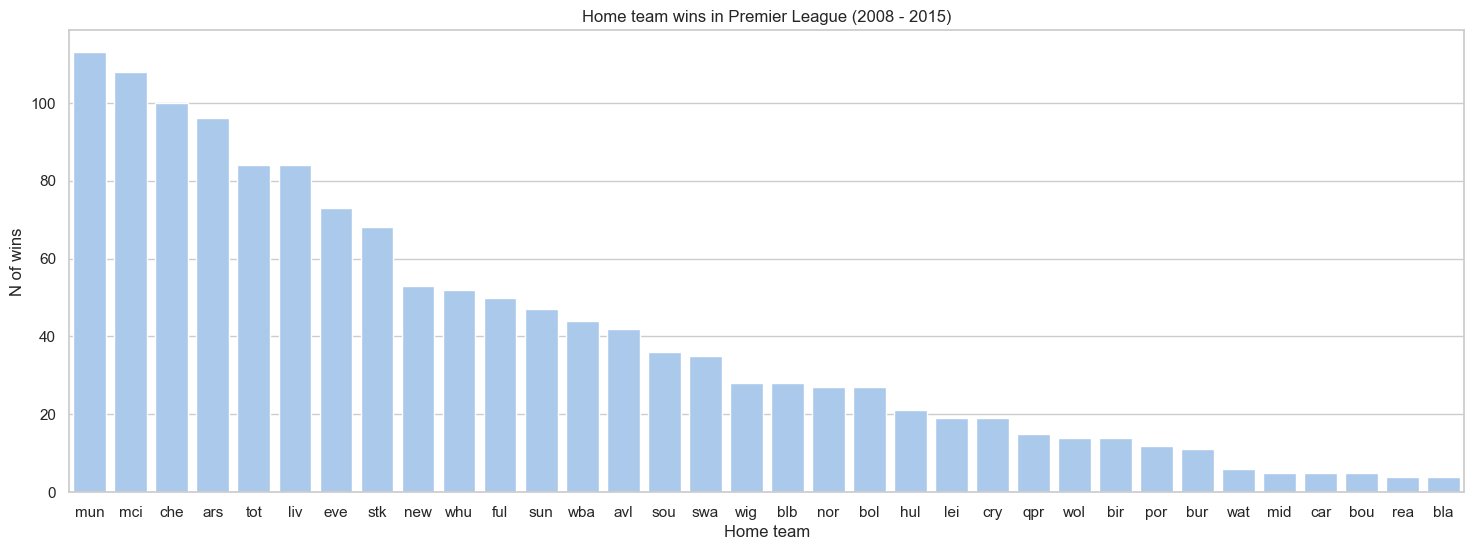

In [13]:
sns.set(rc={'figure.figsize':(18,6)})
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(n_wins, 
            x= 'home_team', 
            y= 'home_team_win',
            color = 'b').set(title = 'Home team wins in Premier League (2008 - 2015)',
                             xlabel = "Home team",
                             ylabel = 'N of wins')

In [14]:
df.head()

,name_home_player_1,name_away_player_1,name_home_player_2,name_away_player_2,name_home_player_3,name_away_player_3,name_home_player_4,name_away_player_4,name_home_player_5,name_away_player_5,...,name_away_player_8,name_home_player_9,name_away_player_9,name_home_player_10,name_away_player_10,name_home_player_11,name_away_player_11,home_team,away_team,home_team_win
0,edwin_van_der_sar,shay_given,wes_brown,habib_beye,rio_ferdinand,steven_taylor,nemanja_vidic,fabricio_coloccini,patrice_evra,charles_n'zogbia,...,nicky_butt,ryan_giggs,jonas_gutierrez,fraizer_campbell,damien_duff,wayne_rooney,obafemi_martins,mun,new,0
1,manuel_almunia,scott_carson,bacary_sagna,carl_hoefkens,william_gallas,leon_barnett,johan_djourou,abdoulaye_meite,gael_clichy,paul_robinson,...,chris_brunt,samir_nasri,james_morrison,emmanuel_adebayor,marek_cech,nicklas_bendtner,ishmael_miller,ars,wba,1
2,craig_gordon,pepe_reina,pascal_chimbonda,alvaro_arbeloa,nyron_nosworthy,jamie_carragher,danny_collins,sami_hyypiae,phil_bardsley,andrea_dossena,...,damien_plessis,kieran_richardson,yossi_benayoun,el_hadji_diouf,robbie_keane,daryl_murphy,fernando_torres,sun,liv,0
3,robert_green,chris_kirkland,valon_behrami,mario_melchiot,matthew_upson,emmerson_boyce,calum_davenport,maynor_figueroa,lucas_neill,paul_scharner,...,wilson_palacios,matthew_etherington,olivier_kapo,carlton_cole,amr_zaki,dean_ashton,emile_heskey,whu,wig,1
4,tim_howard,paul_robinson,philip_neville,andre_ooijer,joseph_yobo,christopher_samba,joleon_lescott,ryan_nelsen,nuno_valente,stephen_warnock,...,morten_gamst_pedersen,leighton_baines,steven_reid,leon_osman,jason_roberts,aiyegbeni_yakubu,roque_santa_cruz,eve,blb,0


In [15]:
name_h_players = 'name_home_player_'
name_a_players = 'name_away_player_'
name_home_players = []
name_away_players = []

for i in range(11):
    name_home_players.append(name_h_players+str(i+1))
    name_away_players.append(name_a_players+str(i+1))

player_columns = name_home_players + name_away_players
print(player_columns)

['name_home_player_1', 'name_home_player_2', 'name_home_player_3', 'name_home_player_4', 'name_home_player_5', 'name_home_player_6', 'name_home_player_7', 'name_home_player_8', 'name_home_player_9', 'name_home_player_10', 'name_home_player_11', 'name_away_player_1', 'name_away_player_2', 'name_away_player_3', 'name_away_player_4', 'name_away_player_5', 'name_away_player_6', 'name_away_player_7', 'name_away_player_8', 'name_away_player_9', 'name_away_player_10', 'name_away_player_11']


In [16]:
#Mutual Information
def mutual_info_score_function(series):
    return(mutual_info_score(series,df.home_team_win))

In [17]:
df[player_columns].apply(mutual_info_score_function)

name_home_player_1     0.054808
name_home_player_2     0.077549
name_home_player_3     0.070955
name_home_player_4     0.076016
name_home_player_5     0.091471
name_home_player_6     0.130138
name_home_player_7     0.106218
name_home_player_8     0.135030
name_home_player_9     0.135595
name_home_player_10    0.124627
name_home_player_11    0.098023
name_away_player_1     0.046860
name_away_player_2     0.084345
name_away_player_3     0.074102
name_away_player_4     0.082303
name_away_player_5     0.093866
name_away_player_6     0.122331
name_away_player_7     0.117341
name_away_player_8     0.129954
name_away_player_9     0.150254
name_away_player_10    0.136101
name_away_player_11    0.105611
dtype: float64

In [18]:
# Create a function to apply to each cell using applymap
def encode_players(x, player_column):
    return 1 if x == player_column else 0

One hot enconding on features:

In [19]:
result_dict = {}
all_players = []

#Get all players
for col in df[player_columns]:
    for i in range(len(df[col])):
        #df[col].iloc[i] = Players Name
        if df[col].iloc[i] not in all_players:
            #If player is no in the dict, insert it with an list of empty games until appearence
            all_players.append(df[col].iloc[i])

#Create a dict with all players where the KEY is the player name and the VALUE is a empty list with all matches
for player in all_players:
    result_dict[player] = [0]* len(df)

#Insert the played games in the inserted list:
for col in player_columns:
    for i in range(len(df[col])):
        
        result_dict[df[col].iloc[i]][i] = 1

In [20]:
encoded_df = pd.DataFrame(data = result_dict)

In [21]:
encoded_df.head()

,edwin_van_der_sar,manuel_almunia,craig_gordon,robert_green,tim_howard,bradley_jones,jussi_jaaskelainen,boaz_myhill,petr_cech,tomasz_kuszczak,...,stefan_maierhofer,eddie_johnson,orlando_sa,patrick_agyemang,muamer_tankovic,konstantinos_mitroglou,pozo,adam_armstrong,reece_grego-cox,alexandre_pato
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
encoded_df['home_team'] = df[['home_team']]
encoded_df['away_team'] = df[['away_team']]
encoded_df = pd.get_dummies(encoded_df, columns = ['home_team'], prefix = 'h_')
encoded_df = pd.get_dummies(encoded_df, columns = ['away_team'], prefix = 'a_')
encoded_df['home_team_win'] = df[['home_team_win']]

In [23]:
encoded_df.head()

,edwin_van_der_sar,manuel_almunia,craig_gordon,robert_green,tim_howard,bradley_jones,jussi_jaaskelainen,boaz_myhill,petr_cech,tomasz_kuszczak,...,a__stk,a__sun,a__swa,a__tot,a__wat,a__wba,a__whu,a__wig,a__wol,home_team_win
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
n_of_games = encoded_df.copy()

for col in n_of_games.columns :
    if col.startswith('h_') or col.startswith('a_'):
        n_of_games.drop(col,axis = 1,inplace=True)

n_of_games.drop('home_team_win', axis = 1, inplace = True)

In [ ]:
players = n_of_games.sum().index
wins = n_of_games.sum().values

Fazer um scatterplot:
x = n_de_partidas_em_casa
y = n_de_vitorias_em_casa

In [ ]:
sns.scatterplot(x = players, 
            y = wins,
            color = 'b').set(title = 'Player wins in Premier League (2008 - 2015)',
                             xlabel = "Players",
                             ylabel = 'N of wins')